In [4]:
from google.colab import files
uploaded = files.upload()

Saving Hospitalisation details.csv to Hospitalisation details.csv
Saving Medical Examinations.csv to Medical Examinations.csv
Saving Names.xlsx to Names.xlsx


1. Load and Collate Data:




In [5]:
import pandas as pd

# Load the datasets
hospitalization_df = pd.read_csv('Hospitalisation details.csv')
medical_examinations_df = pd.read_csv('Medical Examinations.csv')
names_df = pd.read_excel('Names.xlsx')

# Merge datasets on Customer ID
merged_df = hospitalization_df.merge(medical_examinations_df, on='Customer ID').merge(names_df, on='Customer ID')

# Display the first few rows of the merged dataframe
print(merged_df.head())

  Customer ID  year month  date  children  charges Hospital tier City tier  \
0      Id2335  1992   Jul     9         0   563.84      tier - 2  tier - 3   
1      Id2334  1992   Nov    30         0   570.62      tier - 2  tier - 1   
2      Id2333  1993   Jun    30         0   600.00      tier - 2  tier - 1   
3      Id2332  1992   Sep    13         0   604.54      tier - 3  tier - 3   
4      Id2331  1998   Jul    27         0   637.26      tier - 3  tier - 3   

  State ID    BMI  HBA1C Heart Issues Any Transplants Cancer history  \
0    R1013  17.58   4.51           No              No             No   
1    R1013  17.60   4.39           No              No             No   
2    R1013  16.47   6.35           No              No            Yes   
3    R1013  17.70   6.28           No              No             No   
4    R1013  22.34   5.57           No              No             No   

  NumberOfMajorSurgeries smoker                                name  
0                      1    

**2. Check for Missing Values:**

In [7]:
# Check for missing values
missing_values = merged_df.isnull().sum()
print(missing_values)

Customer ID               0
year                      0
month                     0
date                      0
children                  0
charges                   0
Hospital tier             0
City tier                 0
State ID                  0
BMI                       0
HBA1C                     0
Heart Issues              0
Any Transplants           0
Cancer history            0
NumberOfMajorSurgeries    0
smoker                    0
name                      0
dtype: int64


**3. Handle Missing Values and Clean Data:**

In [8]:
# Handle missing values (example: filling missing values with mean or dropping rows/columns)
merged_df = merged_df.dropna()

# Clean the 'NumberOfMajorSurgeries' column if it contains string values
merged_df['NumberOfMajorSurgeries'] = merged_df['NumberOfMajorSurgeries'].apply(lambda x: str(x).replace('string_to_replace', 'desired_value'))

print(merged_df.head())

  Customer ID  year month  date  children  charges Hospital tier City tier  \
0      Id2335  1992   Jul     9         0   563.84      tier - 2  tier - 3   
1      Id2334  1992   Nov    30         0   570.62      tier - 2  tier - 1   
2      Id2333  1993   Jun    30         0   600.00      tier - 2  tier - 1   
3      Id2332  1992   Sep    13         0   604.54      tier - 3  tier - 3   
4      Id2331  1998   Jul    27         0   637.26      tier - 3  tier - 3   

  State ID    BMI  HBA1C Heart Issues Any Transplants Cancer history  \
0    R1013  17.58   4.51           No              No             No   
1    R1013  17.60   4.39           No              No             No   
2    R1013  16.47   6.35           No              No            Yes   
3    R1013  17.70   6.28           No              No             No   
4    R1013  22.34   5.57           No              No             No   

  NumberOfMajorSurgeries smoker                                name  
0                      1    

**4. Calculate Age and Determine Gender:**

In [10]:
from datetime import datetime

# Calculate age based on date of birth
current_year = datetime.now().year
# Convert 'year' column to numeric, handling non-numeric values
merged_df['year'] = pd.to_numeric(merged_df['year'], errors='coerce')
merged_df['Age'] = current_year - merged_df['year']

# Determine gender based on salutations in names
def extract_gender(name):
    if 'Mr' in name:
        return 'Male'
    elif 'Ms' in name or 'Mrs' in name:
        return 'Female'
    else:
        return 'Unknown'

merged_df['Gender'] = merged_df['name'].apply(extract_gender)

print(merged_df.head())

  Customer ID    year month  date  children  charges Hospital tier City tier  \
0      Id2335  1992.0   Jul     9         0   563.84      tier - 2  tier - 3   
1      Id2334  1992.0   Nov    30         0   570.62      tier - 2  tier - 1   
2      Id2333  1993.0   Jun    30         0   600.00      tier - 2  tier - 1   
3      Id2332  1992.0   Sep    13         0   604.54      tier - 3  tier - 3   
4      Id2331  1998.0   Jul    27         0   637.26      tier - 3  tier - 3   

  State ID    BMI  HBA1C Heart Issues Any Transplants Cancer history  \
0    R1013  17.58   4.51           No              No             No   
1    R1013  17.60   4.39           No              No             No   
2    R1013  16.47   6.35           No              No            Yes   
3    R1013  17.70   6.28           No              No             No   
4    R1013  22.34   5.57           No              No             No   

  NumberOfMajorSurgeries smoker                                name   Age  \
0        

**5. Exploratory Data Analysis (EDA):**

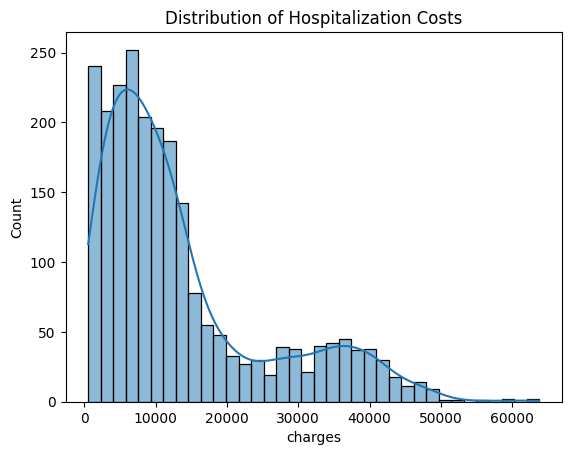

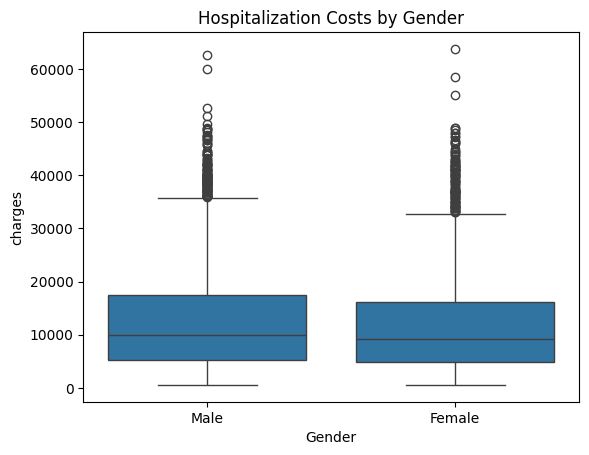

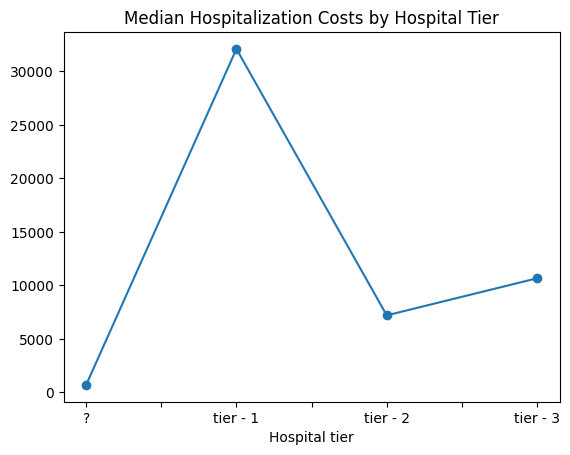

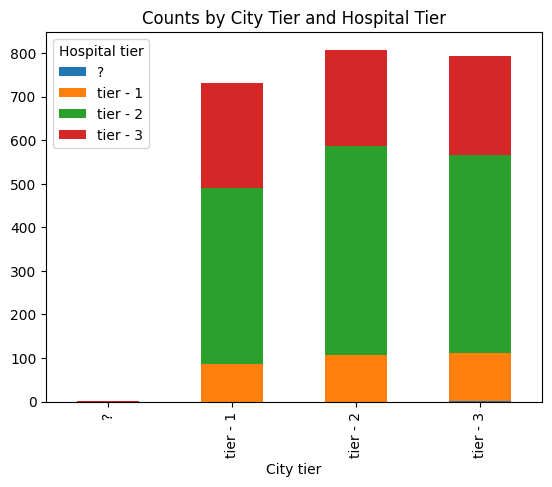

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of hospitalization costs
sns.histplot(merged_df['charges'], kde=True)
plt.title('Distribution of Hospitalization Costs')
plt.show()

# Boxplot by gender
sns.boxplot(x='Gender', y='charges', data=merged_df)
plt.title('Hospitalization Costs by Gender')
plt.show()

# Radar chart for median hospitalization costs by hospital tier
median_costs = merged_df.groupby('Hospital tier')['charges'].median()
median_costs.plot(kind='line', marker='o')
plt.title('Median Hospitalization Costs by Hospital Tier')
plt.show()

# Frequency table and stacked bar chart for city and hospital tier counts
freq_table = pd.crosstab(merged_df['City tier'], merged_df['Hospital tier'])
freq_table.plot(kind='bar', stacked=True)
plt.title('Counts by City Tier and Hospital Tier')
plt.show()

**6. Hypothesis Testing:**

In [12]:
from scipy import stats

# Test hypotheses
# a. Average hospitalization costs by hospital type
anova_result = stats.f_oneway(
    merged_df[merged_df['Hospital tier'] == 'tier-1']['charges'],
    merged_df[merged_df['Hospital tier'] == 'tier-2']['charges'],
    merged_df[merged_df['Hospital tier'] == 'tier-3']['charges']
)
print(f'ANOVA result for hospital tiers: p-value = {anova_result.pvalue}')

# b. Average hospitalization costs by city type
anova_result = stats.f_oneway(
    merged_df[merged_df['City tier'] == 'tier-1']['charges'],
    merged_df[merged_df['City tier'] == 'tier-2']['charges'],
    merged_df[merged_df['City tier'] == 'tier-3']['charges']
)
print(f'ANOVA result for city tiers: p-value = {anova_result.pvalue}')

# c. Average hospitalization cost for smokers vs non-smokers
ttest_result = stats.ttest_ind(
    merged_df[merged_df['smoker'] == 'yes']['charges'],
    merged_df[merged_df['smoker'] == 'no']['charges']
)
print(f'T-test result for smokers vs non-smokers: p-value = {ttest_result.pvalue}')

# d. Independence of smoking and heart issues
contingency_table = pd.crosstab(merged_df['smoker'], merged_df['Heart Issues'])
chi2_result = stats.chi2_contingency(contingency_table)
print(f'Chi-square test result for smoking and heart issues: p-value = {chi2_result[1]}')

ANOVA result for hospital tiers: p-value = nan
ANOVA result for city tiers: p-value = nan
T-test result for smokers vs non-smokers: p-value = nan
Chi-square test result for smoking and heart issues: p-value = 0.4980479888388789


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


**7. Model Development:**

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd

# Prepare the data for modeling
X = merged_df.drop(columns=['charges'])
y = merged_df['charges']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
print(f"Categorical columns: {categorical_cols}")

# Create a ColumnTransformer to handle preprocessing for different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), X.select_dtypes(exclude=['object']).columns),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ])

# Create a pipeline with the preprocessor and the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),
    ('regressor', LinearRegression())
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Debugging: Check for missing values in training data
print("Missing values in X_train:")
print(X_train.isnull().sum())

# Debugging: Check for types in training data
print("Data types in X_train:")
print(X_train.dtypes)

# Cross-validate the model
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error', error_score='raise')
print(f'Cross-validated MSE: {cv_results.mean()}')

# Fit the model
pipeline.fit(X_train, y_train)

# Predict on test data
predictions = pipeline.predict(X_test)
print(predictions)

Categorical columns: Index(['Customer ID', 'month', 'Hospital tier', 'City tier', 'State ID',
       'Heart Issues', 'Any Transplants', 'Cancer history',
       'NumberOfMajorSurgeries', 'smoker', 'name', 'Gender'],
      dtype='object')
Missing values in X_train:
Customer ID               0
year                      2
month                     0
date                      0
children                  0
Hospital tier             0
City tier                 0
State ID                  0
BMI                       0
HBA1C                     0
Heart Issues              0
Any Transplants           0
Cancer history            0
NumberOfMajorSurgeries    0
smoker                    0
name                      0
Age                       2
Gender                    0
dtype: int64
Data types in X_train:
Customer ID                object
year                      float64
month                      object
date                        int64
children                    int64
Hospital tier            

**8. Case Scenario Analysis & Predicted Hospitalization Cost:**

In [34]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer # Import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import numpy as np
from datetime import datetime

# Patient information for case scenario
patient_data = {
    'year': [1988],
    'month': [12],
    'date': [28],
    'children': [2],
    'Hospital tier': ['tier-1'],
    'City tier': ['tier-1'],
    'State ID': ['R1011'],
    'BMI': [85 / (1.70**2)],  # BMI calculation
    'HBA1C': [5.8],
    'Heart Issues': ['no'],
    'Any Transplants': ['no'],
    'Cancer history': ['yes'],
    'NumberOfMajorSurgeries': [0],
    'smoker': ['yes'],
    'Gender': ['Female']  # Directly adding the Gender field
}

# Convert to DataFrame
patient_df = pd.DataFrame(patient_data)

# Calculate age based on date of birth
current_year = datetime.now().year
patient_df['Age'] = current_year - patient_df['year']

# Prepare the data for modeling
X = merged_df.drop(columns=['charges'])
y = merged_df['charges']

# Ensure X_patient has the same columns as X
missing_cols = set(X.columns) - set(patient_df.columns)
for col in missing_cols:
    patient_df[col] = 0

# Reorder columns to match the order in X
patient_df = patient_df[X.columns]

# Ensure all columns have the correct type
for col in patient_df.select_dtypes(include=['object']).columns:
    patient_df[col] = patient_df[col].astype(str)

for col in patient_df.select_dtypes(include=['number']).columns:
    patient_df[col] = pd.to_numeric(patient_df[col])

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create a ColumnTransformer to handle preprocessing for different columns
# Convert categorical columns to string type before OneHotEncoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), X.select_dtypes(exclude=['object']).columns),
        ('cat', Pipeline([
            ('string_converter', FunctionTransformer(lambda x: x.astype(str), validate=False)), # Convert to string
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ]), categorical_cols)
    ])


# Create a pipeline with the preprocessor and the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),
    ('regressor', LinearRegression())
])

# Fit the pipeline on the entire dataset
pipeline.fit(X, y)

# Preprocess the patient data
patient_df_processed = pipeline.named_steps['preprocessor'].transform(patient_df)

# Scale the patient data
patient_df_scaled = pipeline.named_steps['scaler'].transform(patient_df_processed)

# Predict the cost for the patient in the case scenario
predicted_cost = pipeline.named_steps['regressor'].predict(patient_df_scaled)
print(f'Estimated hospitalization cost for the patient: {predicted_cost[0]}')

Estimated hospitalization cost for the patient: 21348.244202499744
